In [2]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
house=pd.read_csv("housing.csv")
house

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [5]:
house.shape

(20640, 10)

In [6]:
house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
house.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [10]:
house.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [11]:
house.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

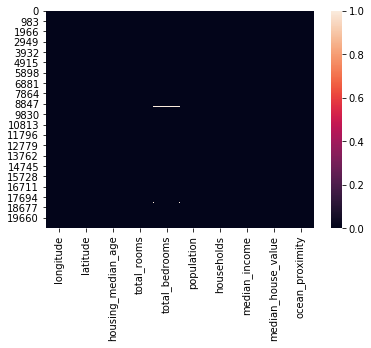

In [12]:
sns.heatmap(house.isnull())

In [13]:
house['total_bedrooms'].fillna(method='ffill',inplace=True)

In [14]:
house.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

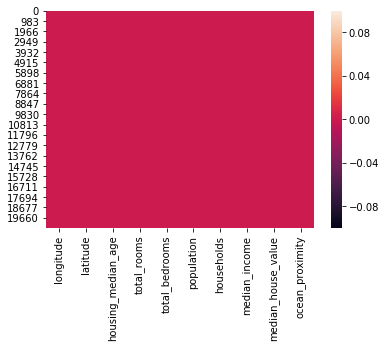

In [15]:
sns.heatmap(house.isnull())

In [17]:
df_house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.642151,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.876678,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [16]:
house.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

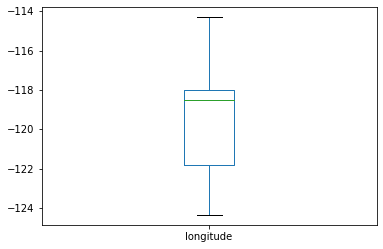

In [17]:
house['longitude'].plot.box()

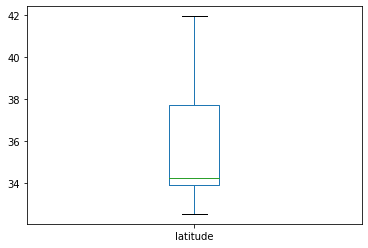

In [18]:
house['latitude'].plot.box()

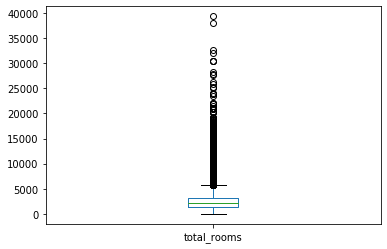

In [19]:
house['total_rooms'].plot.box()

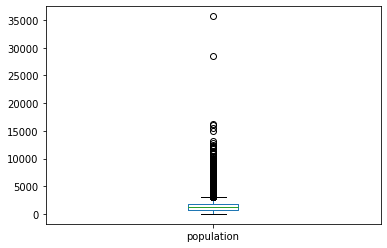

In [20]:
house['population'].plot.box()

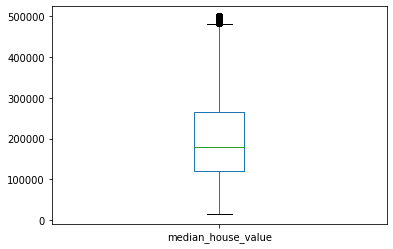

In [21]:
house['median_house_value'].plot.box()

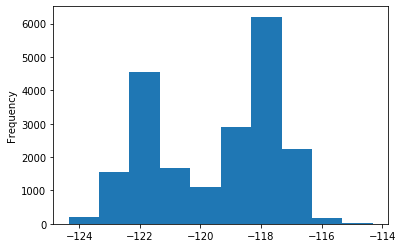

In [22]:
house['longitude'].plot.hist()

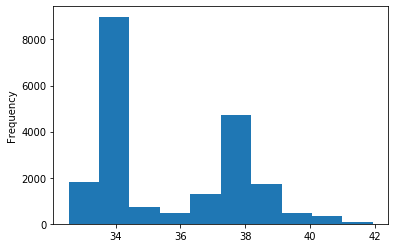

In [23]:
house['latitude'].plot.hist()

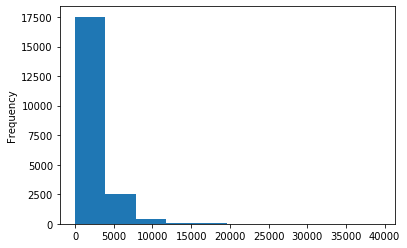

In [24]:
house['total_rooms'].plot.hist()

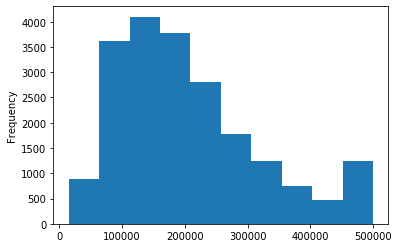

In [25]:
house['median_house_value'].plot.hist()

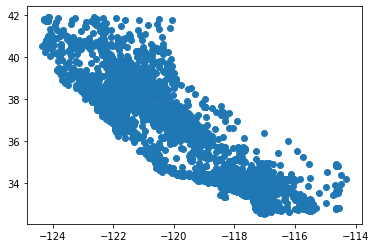

In [27]:
plt.scatter(house['longitude'],house['latitude'])
plt.show()

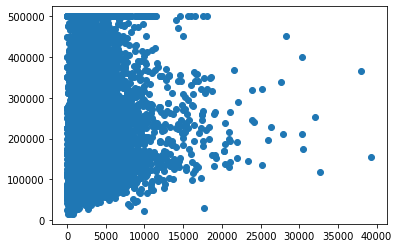

In [28]:
plt.scatter(house['total_rooms'],house['median_house_value'])
plt.show()

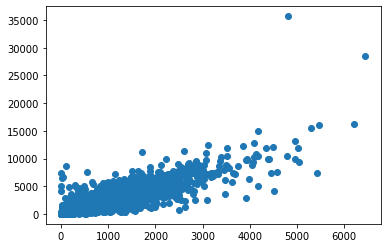

In [30]:
plt.scatter(house['total_bedrooms'],house['population'])
plt.show()

longitude                AxesSubplot(0.125,0.125;0.065678x0.755)
latitude              AxesSubplot(0.203814,0.125;0.065678x0.755)
housing_median_age    AxesSubplot(0.282627,0.125;0.065678x0.755)
total_rooms           AxesSubplot(0.361441,0.125;0.065678x0.755)
total_bedrooms        AxesSubplot(0.440254,0.125;0.065678x0.755)
population            AxesSubplot(0.519068,0.125;0.065678x0.755)
households            AxesSubplot(0.597881,0.125;0.065678x0.755)
median_income         AxesSubplot(0.676695,0.125;0.065678x0.755)
median_house_value    AxesSubplot(0.755508,0.125;0.065678x0.755)
dtype: object

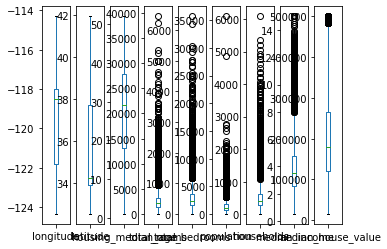

In [31]:
house.plot(kind='box',subplots=True,layout=(1,10))

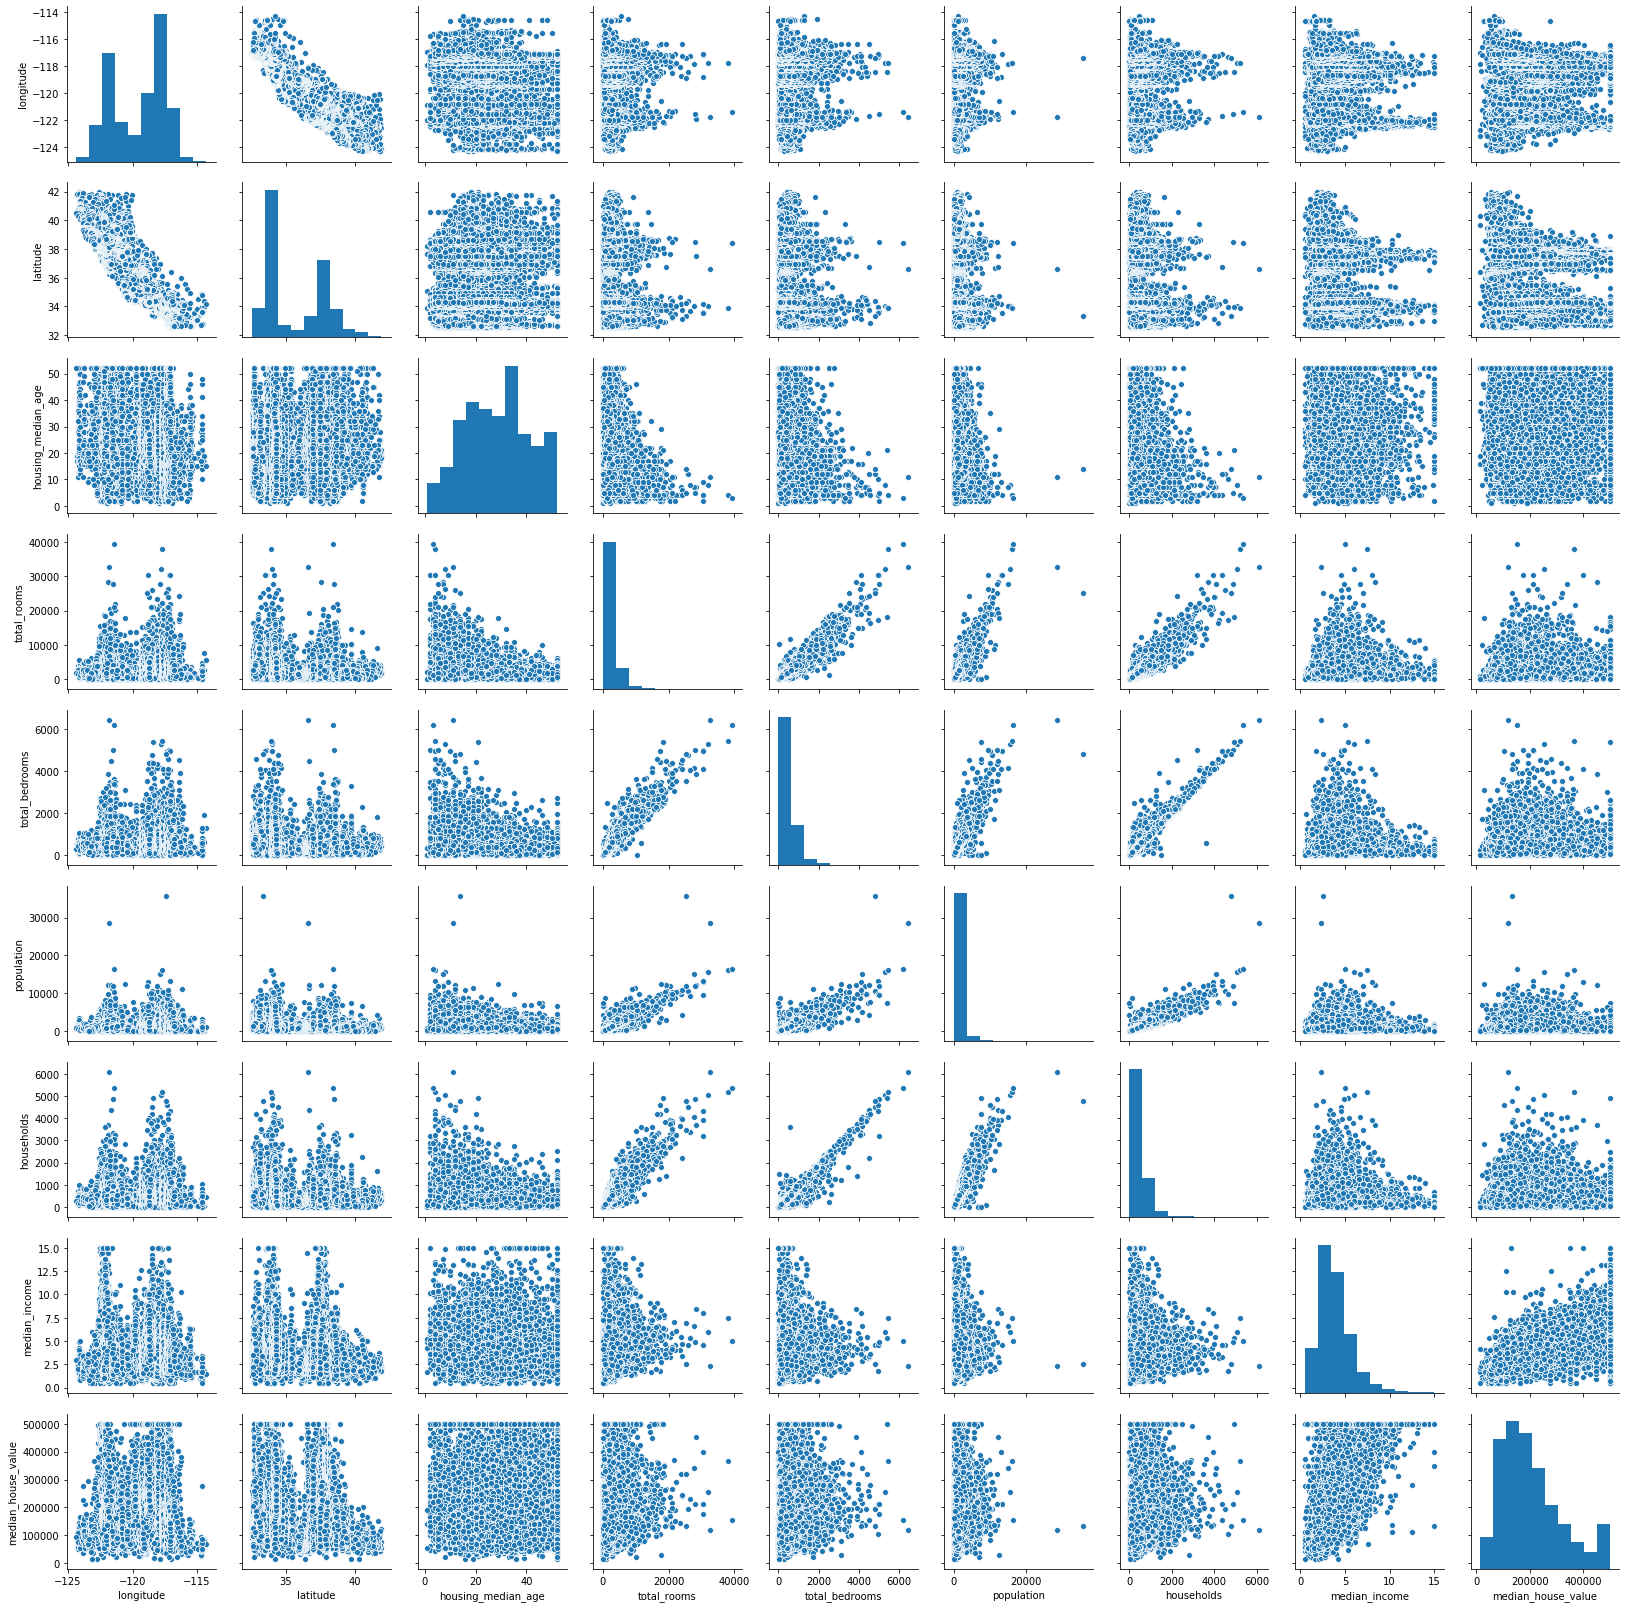

In [32]:
sns.pairplot(house)

In [33]:
house.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.070442,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.067535,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319312,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925347,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.070442,-0.067535,-0.319312,0.925347,1.000000,0.872491,0.972942,-0.007473,0.049294
population,0.099773,-0.108785,-0.296244,0.857126,0.872491,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.972942,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007473,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049294,-0.024650,0.065843,0.688075,1.000000


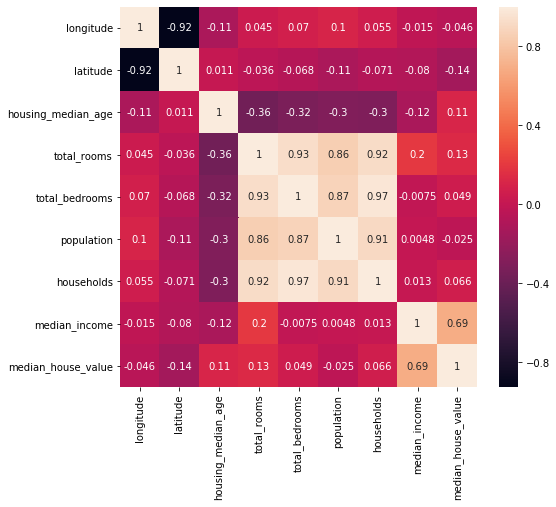

In [34]:
corr_hmap=house.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [35]:
house.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [36]:
house1=house.drop("ocean_proximity",axis=1)
house1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [37]:
house1.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [38]:
house1.shape

(20640, 9)

In [39]:
house1.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.070442,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.067535,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.319312,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.925347,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.070442,-0.067535,-0.319312,0.925347,1.000000,0.872491,0.972942,-0.007473,0.049294
population,0.099773,-0.108785,-0.296244,0.857126,0.872491,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.972942,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007473,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049294,-0.024650,0.065843,0.688075,1.000000


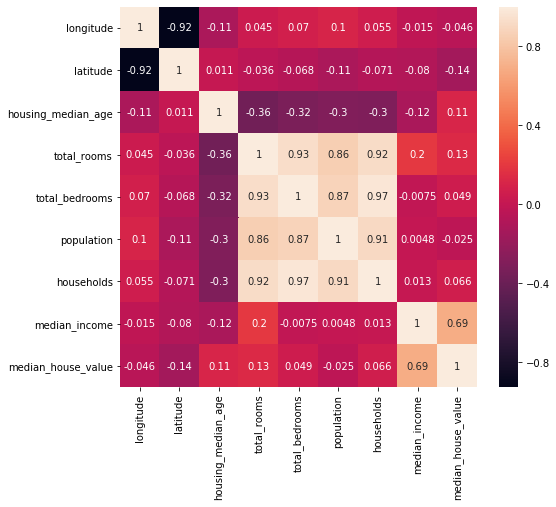

In [40]:
corr_hmap=house1.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(house1))

In [57]:
z

array([[1.32783522, 1.05254828, 0.98214266, ..., 0.97703285, 2.34476576,
        2.12963148],
       [1.32284391, 1.04318455, 0.60701891, ..., 1.66996103, 2.33223796,
        1.31415614],
       [1.33282653, 1.03850269, 1.85618152, ..., 0.84363692, 1.7826994 ,
        1.25869341],
       ...,
       [0.8237132 , 1.77823747, 0.92485123, ..., 0.17404163, 1.14259331,
        0.99274649],
       [0.87362627, 1.77823747, 0.84539315, ..., 0.39375258, 1.05458292,
        1.05860847],
       [0.83369581, 1.75014627, 1.00430931, ..., 0.07967221, 0.78012947,
        1.01787803]])

In [42]:
threshold=3
print(np.where(z>3))

(array([   95,    95,   104, ..., 20629, 20629, 20629], dtype=int64), array([4, 6, 4, ..., 4, 5, 6], dtype=int64))


In [43]:
house_new=house1[(z<3).all(axis=1)]

In [44]:
house_new

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0


In [45]:
house_new.shape

(19746, 9)

In [46]:
house_new.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

In [47]:
x=house_new.drop('median_house_value',axis='columns')
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [48]:
y=house_new.median_house_value
y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [49]:
lm=LinearRegression()

In [50]:
x.shape

(19746, 8)

In [51]:
y.shape

(19746,)

In [52]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
x.shape

(19746, 8)

In [54]:
x.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462


In [55]:
t=np.array([-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252])

In [56]:
t.shape

(8,)

In [57]:
t=t.reshape(1,-1)

In [58]:
lm.predict(t)

array([434947.97427194])

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=96,random_state=33)

In [100]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
lm.score(x_train,y_train)

0.6278004272787507

In [102]:
lm.coef_

array([-3.89522425e+04, -3.90402917e+04,  1.26603022e+03, -1.76976593e+01,
        1.52073329e+02, -5.84421965e+01,  1.13949817e+02,  4.58785284e+04])

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
max_r_score=0
for r_state in range(30,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=r_state)
    lr=linear_model.LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2_score corresponding to random state:",r_state,"is",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print("max r2_score corresponding to",final_r_state,"is",max_r_score)

r2_score corresponding to random state: 30 is 0.6636829704771433
r2_score corresponding to random state: 31 is 0.46004631727690815
r2_score corresponding to random state: 32 is 0.6437235555170179
r2_score corresponding to random state: 33 is 0.15717554281218182
r2_score corresponding to random state: 34 is 0.704533691302242
r2_score corresponding to random state: 35 is 0.6412572873807554
r2_score corresponding to random state: 36 is 0.5848627415179797
r2_score corresponding to random state: 37 is 0.4491067014080554
r2_score corresponding to random state: 38 is 0.1965975778638127
r2_score corresponding to random state: 39 is 0.7020130513831357
r2_score corresponding to random state: 40 is 0.6116907357527144
r2_score corresponding to random state: 41 is 0.6779348466429029
r2_score corresponding to random state: 42 is 0.5979173738476733
r2_score corresponding to random state: 43 is 0.49500191300028396
r2_score corresponding to random state: 44 is 0.5524163379960529
r2_score corresponding 

In [104]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
lr=linear_model.LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
y_pred=lr.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
print("r2score is:",r2_scr)


r2score is: 0.607360687832645


In [105]:
from sklearn.externals import joblib
joblib.dump(lm,"housing.csv")

['housing.csv']